In [73]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
train = pd.read_csv("train_bikes.csv",parse_dates=['datetime'])

In [17]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.season.value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [6]:

train.shape

(10886, 12)

In [7]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [8]:
train.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='count'>

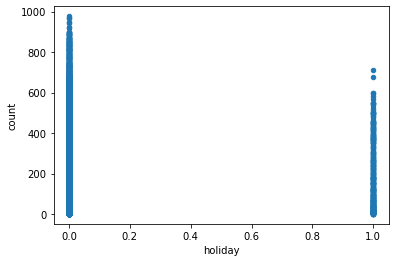

In [9]:
train.plot.scatter(x='holiday',y='count')

In [ ]:
#!pip install pandas-profiling

In [10]:
#import pandas_profiling

In [ ]:
#train.profile_report()

In [11]:
train.isnull().values.any()

False

In [62]:
dd = train

In [63]:
dd.datetime.dt.year.value_counts()

2012    5464
2011    5422
Name: datetime, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

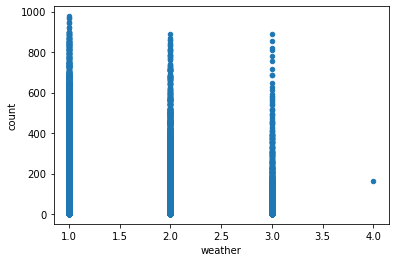

In [10]:
train.plot.scatter(x='weather',y='count')

In [11]:
dd =train

In [36]:
def plot_by_hour(data,year=None,agg='sum'):
    dd = data
    if year:
        dd = dd[dd.datetime.dt.year == year]
        dd.loc[:,('hour')] = dd.datetime.dt.hour
        dd.loc[:,('year')] = dd.datetime.dt.year
        
        by_hour = dd.groupby(['hour','workingday'])['count'].agg(agg).unstack()
    return by_hour.plot(kind= 'bar',ylim=(0,80000),figsize =(15,5),width = 0.9,title = "year = {0}".format(year))

C:\Users\Siddharth Thorat\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Siddharth Thorat\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


<AxesSubplot:title={'center':'year = 2011'}, xlabel='hour'>

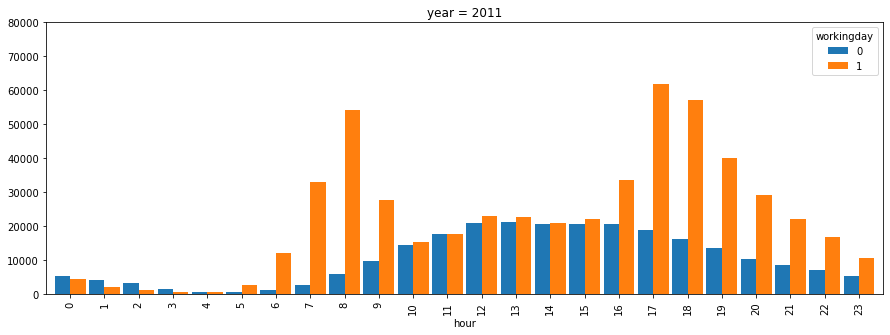

In [40]:
plot_by_hour(train,2011)

In [46]:
dd.groupby(['hour','workingday'])['count'].sum().unstack()

workingday,0,1
hour,,
0,13701,11387
1,10427,4945
2,7686,2573
3,3677,1414
4,1239,1593
5,1331,7604
6,2899,31799
7,6854,90114
8,16277,148783


In [42]:
dd

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22


C:\Users\Siddharth Thorat\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Siddharth Thorat\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\Siddharth Thorat\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

<AxesSubplot:title={'center':'Year = 2012'}, xlabel='hour'>

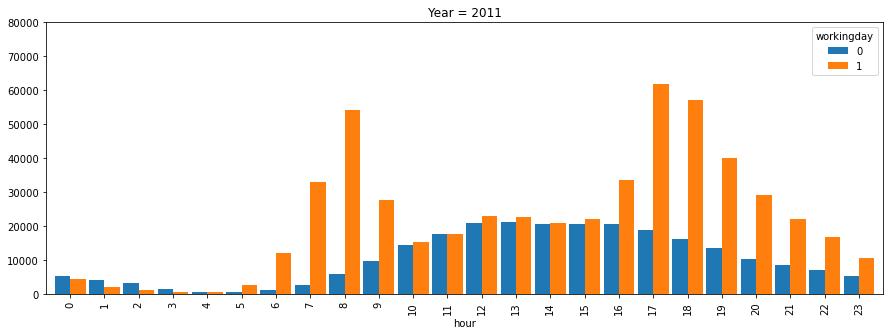

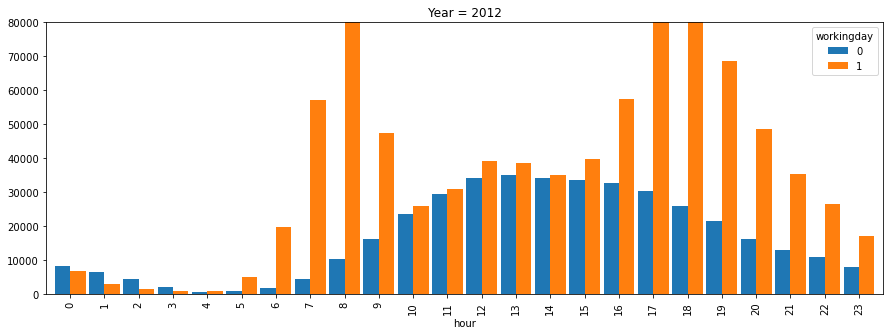

In [20]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data
    if year: dd = dd[ dd.datetime.dt.year == year ]
    dd.loc[:, ('hour')] = dd.datetime.dt.hour # extracting the hour data if the year in the data is equal to the year passed as argument
    
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack() # groupby hour and working day
    return by_hour.plot(kind='bar', ylim=(0, 80000), figsize=(15,5), width=0.9, title="Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(train, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(train, year=2012) # plotting the count plot based on hour for 2012

In [26]:
dd.loc[:,('hour')] = dd.datetime.dt.hour

In [49]:
dd=dd.drop('hour',axis=1)

In [52]:
dd['hour'] = dd.datetime.dt.hour

(1.0, 1500.0)

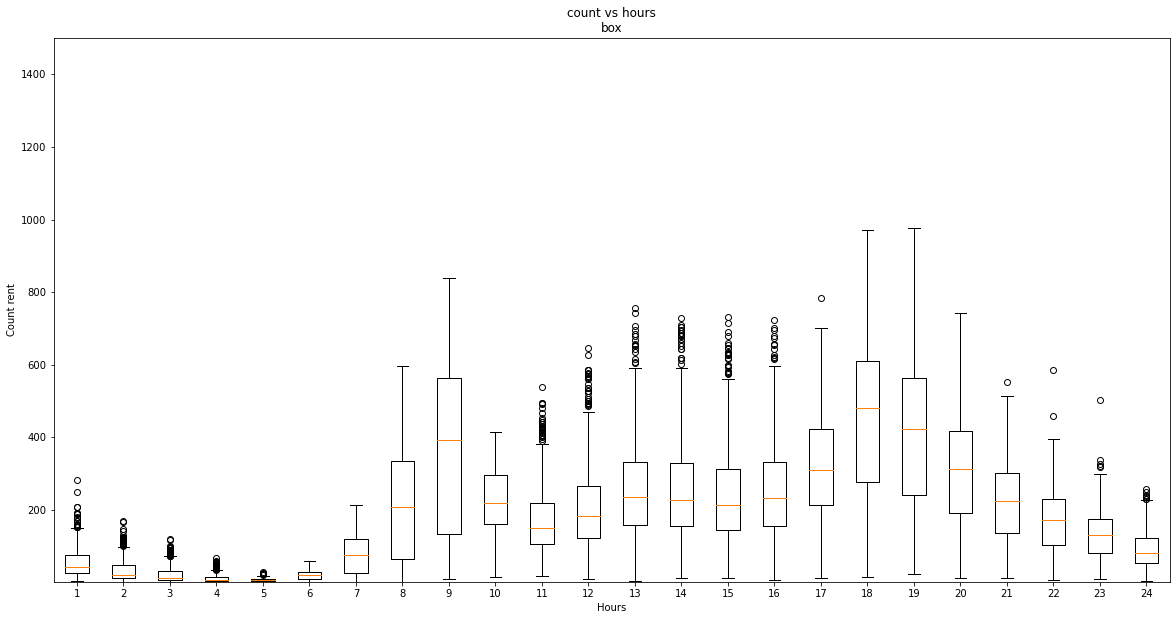

In [72]:
hours = {}
for hour in range(24):
   hours[hour] = dd[dd.hour == hour]['count'].values

plt.figure(figsize=(20,10))
plt.ylabel("Count rent")
plt.xlabel("Hours")
plt.title("count vs hours\n" + 'box')
plt.boxplot( [hours[hour] for hour in range(24)] )
    
axis = plt.gca()
axis.set_ylim([1, 1500])

In [74]:
# method to convert categorical data to numerical data
def categorical_to_numeric(x):
    if 0 <=  x < 6:
        return 0
    elif 6 <= x < 13:
        return 1
    elif 13 <= x < 19:
        return 2
    elif 19 <= x < 24:
        return 3

In [78]:
train['hour'] = train.datetime.dt.hour

In [79]:

train['hour']= train['hour'].apply(categorical_to_numeric)

In [81]:
train['hour'].value_counts()

1    3186
2    2736
0    2684
3    2280
Name: hour, dtype: int64

In [83]:
train.drop('datetime',axis=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,3
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,3
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,3
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,3


<function matplotlib.pyplot.show(close=None, block=None)>

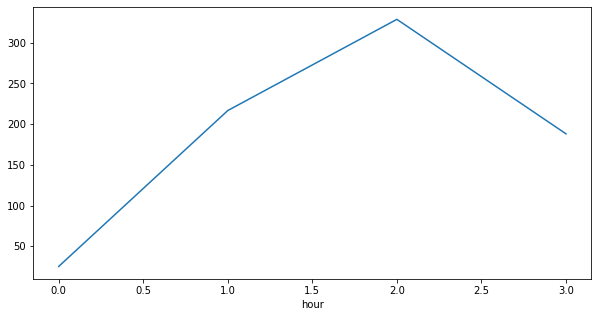

In [99]:
figure,axes = plt.subplots(figsize = (10,5))
hour = train.groupby(['hour'])['count'].agg('mean')
hour.plot(kind='line',ax = axes)
plt.show